In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import twint
import nest_asyncio


%matplotlib inline

In [2]:
nest_asyncio.apply()

In [9]:
t = twint.Config()
t.Username = "YahooSportsNBA"
t.Since = '2021-01-31'
t.Pandas = True
twint.run.Search(t)

1371523338527444993 2021-03-15 14:07:00 -0400 <YahooSportsNBA> The @WNBA unveiled a new logo to celebrate its 25th anniversary 👀 #CountIt   https://t.co/vJwBnTPf7F
1371516350213029896 2021-03-15 13:39:14 -0400 <YahooSportsNBA> 🔘 JaVale McGee getting interest from the Nets 🔘 What's going on with DeMar DeRozan? 🔘 Nurk returning soon?   More notes from @ChrisBHaynes in Hoopla with Haynes ➡️  https://t.co/WyjsDGXVcE  https://t.co/r5yXvEatqR
1371286088405385216 2021-03-14 22:24:15 -0400 <YahooSportsNBA> ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥   https://t.co/w96pJBWhUT
1371278872881336320 2021-03-14 21:55:35 -0400 <YahooSportsNBA> Jayson Tatum made this look too easy 👀   https://t.co/MyxA5l6b77
1371263992836943874 2021-03-14 20:56:27 -0400 <YahooSportsNBA> Jaylen faked 'em out 😂   https://t.co/MNMHPc0qFA
1371254793176375302 2021-03-14 20:19:54 -0400 <YahooSportsNBA> Ben Simmons with authority 🔨  (via @sixers)   https://t.co/CMlevDT3dv
1371242774528466945 2021-03-14 19:32:08 -0400 <YahooSp

1364892898911686658 2021-02-25 06:00:00 -0400 <YahooSportsNBA> "KD is the best player in the world right now."  @LaJethroJenkins and Seerat Sohi break down the red-hot Nets and which teams could potentially matchup best with them.
1364799134708867073 2021-02-24 23:47:25 -0400 <YahooSportsNBA> Spida too tough 😬  (via @utahjazz)   https://t.co/XNpGEU0ies
1364759455544406021 2021-02-24 21:09:44 -0400 <YahooSportsNBA> Myles says 🚫   https://t.co/6VciNRYd03
1364748956891234304 2021-02-24 20:28:01 -0400 <YahooSportsNBA> Anthony Edwards is sooo mean to the rims 😳   https://t.co/74enz4puOw
1364748302957219843 2021-02-24 20:25:25 -0400 <YahooSportsNBA> Gallo showing off the range 🎯   https://t.co/vPUvwO4Xtn
1364687975511183363 2021-02-24 16:25:42 -0400 <YahooSportsNBA> Fans logging on when they think their team got disrespected on national TV games...  https://t.co/9UwQjJ8A5Q
1364675723395403777 2021-02-24 15:37:01 -0400 <YahooSportsNBA> The NBA released the second half of the 2021 schedule.   

1359224066096443397 2021-02-09 14:34:05 -0400 <YahooSportsNBA> After 11 seasons, @ReneeMontgomery is retiring to focus on her social justice work in Atlanta.  ➡️  https://t.co/1Z63bp8bop  https://t.co/6pP4oAt3ob
1358988145140797443 2021-02-08 22:56:37 -0400 <YahooSportsNBA> Holy Murray 😱   https://t.co/8T4xggYYUO
1358973403214999568 2021-02-08 21:58:02 -0400 <YahooSportsNBA> Anthony Edwards got up 😤   https://t.co/97I4VqQukq
1358944748271140864 2021-02-08 20:04:10 -0400 <YahooSportsNBA> The typically old school Kevin Garnett was unexpectedly complimentary of today’s NBA 👀  ➡️  https://t.co/Tj2ZBB248Q  https://t.co/S25EEzg10v
1358895865566486531 2021-02-08 16:49:56 -0400 <YahooSportsNBA> "Racism is taught."  Donovan Mitchell and Rudy Gobert called out a Utah school for initially allowing parents to opt their students out of Black History Month curriculum.   ➡️  https://t.co/eaOm0nIwSg  https://t.co/et2OyFL6Pv
1358888071119450118 2021-02-08 16:18:57 -0400 <YahooSportsNBA> "You didn't los

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [10]:
df = twint.storage.panda.Tweets_df

In [11]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1371523338527444993,1371523338527444993,1.615832e+12,2021-03-15 14:07:00,-0400,,The @WNBA unveiled a new logo to celebrate its...,en,[countit],[],...,,,,,,[],,,,
1,1371516350213029896,1371516350213029896,1.615830e+12,2021-03-15 13:39:14,-0400,,🔘 JaVale McGee getting interest from the Nets ...,en,[],[],...,,,,,,[],,,,
2,1371286088405385216,1371286088405385216,1.615775e+12,2021-03-14 22:24:15,-0400,,"ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥 h...",en,[],[],...,,,,,,[],,,,
3,1371278872881336320,1371278872881336320,1.615773e+12,2021-03-14 21:55:35,-0400,,Jayson Tatum made this look too easy 👀 https...,en,[],[],...,,,,,,[],,,,
4,1371263992836943874,1371263992836943874,1.615770e+12,2021-03-14 20:56:27,-0400,,Jaylen faked 'em out 😂 https://t.co/MNMHPc0qFA,en,[],[],...,,,,,,[],,,,


In [16]:
test_str = df.loc[4,'tweet']
encoded_test_str = test_str.encode('ascii', "ignore")
decoded_test_str = encoded_test_str.decode()
decoded_test_str

"Jaylen faked 'em out    https://t.co/MNMHPc0qFA"

In [3]:
def create_tweets_dataframe(username, start_date, end_date):
    c = twint.Config()
    c.Username = username
    c.Since = start_date
    c.Until = end_date
    c.Pandas = True
    c.Hide_output = True
    twint.run.Search(c)
    
    dataframe = twint.storage.panda.Tweets_df
    return dataframe
    
    
    

In [4]:
yahoo_df = create_tweets_dataframe('YahooSportsNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [5]:
crossover_df = create_tweets_dataframe('TheCrossover', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [6]:
athletic_df = create_tweets_dataframe('TheAthleticNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [7]:
slam_df = create_tweets_dataframe('Slamnewswire', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [9]:
nba_df = create_tweets_dataframe('NBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [10]:
bball_news_df = create_tweets_dataframe('basketbllnews', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [64]:
sb_nation_df = create_tweets_dataframe('SBNationNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [65]:
hoopshype_df = create_tweets_dataframe('hoopshype', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [68]:
len(hoopshype_df)

38560

In [69]:
sum([len(yahoo_df), 
 len(crossover_df), 
 len(athletic_df), 
 len(slam_df), 
 len(sb_nation_df), 
 len(bball_news_df), 
 len(hoopshype_df)])

128512

In [12]:
nba_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [13]:
df_list = [yahoo_df, crossover_df, athletic_df, slam_df, nba_df, bball_news_df]
for dataframe in df_list:
    dataframe.drop(columns=['id', 'conversation_id', 'created_at', 'timezone', 'place',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], inplace=True)

In [14]:
for dataframe in df_list:
    for date_string in dataframe['date']:
        dataframe['date'] = date_string[:10]

In [70]:
for dataframe in [sb_nation_df, hoopshype_df]:
    dataframe.drop(columns=['id', 'conversation_id', 'created_at', 'timezone', 'place',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], inplace=True)

In [71]:
for dataframe in [sb_nation_df, hoopshype_df]:
    for date_string in dataframe['date']:
        dataframe['date'] = date_string[:10]

In [15]:
yahoo_df['source'] = 'Yahoo'
crossover_df['source'] = 'SI'
athletic_df['source'] = 'The Athletic'
slam_df['source'] = 'Slam'
nba_df['source'] = 'NBA'
bball_news_df['source'] = 'Basketball News'

In [72]:
sb_nation_df['source'] = 'SB Nation'
hoopshype_df['source'] = 'HoopsHype'

In [73]:
twitter_df = pd.concat([yahoo_df, crossover_df, athletic_df, sb_nation_df, 
                        hoopshype_df, slam_df, bball_news_df], ignore_index=True)

In [74]:
pd.set_option('display.max_colwidth', 100)
twitter_df.head()

,date,tweet,source
0,2021-02-26,"Obi Toppin is expected to participate in the NBA Slam Dunk Contest, per @ShamsCharania. 👀 https...",Yahoo
1,2021-02-26,MPJ SLAM 💥 https://t.co/bp6XsbTzUT,Yahoo
2,2021-02-26,Timberwolves G Malik Beasley has been suspended for 12 games due to conduct stemming from charge...,Yahoo
3,2021-02-26,Luka's game-winner against the Celtics vs. Luka's game-winner against the Clippers. Unreal 🤯 ...,Yahoo
4,2021-02-26,It's time to stop underrating the Utah Jazz 👀 From @KrystenPeek ⤵️,Yahoo


In [75]:
pd.set_option("display.max_rows", 101)
twitter_df.sample(n=100)

,date,tweet,source
28002,2021-02-26,"Markelle Fultz seeking opinion from shoulder specialist, will miss 76ers' games, practices http...",SI
123152,2021-02-26,Stephen Curry has missed a layup.,HoopsHype
74640,2021-02-26,LeBron's BFF is headed back to Miami and he's pretty happy about it. https://t.co/CeVUZcszhU,SB Nation
104386,2021-02-26,Imagine having that kind of athleticism. https://t.co/jABXjuinCe,HoopsHype
42886,2021-02-26,Is Lonzo Ball basketball Tebow? Let @andrewsharp explain https://t.co/8weD1fjeIc,SI
12006,2021-02-26,"Thunder get: McDermott, Gibson, 2018 2nd-rd pick Bulls get: Payne, Lauvergne, Morrow @ShamsChar...",Yahoo
68321,2021-02-26,These are the true bargains. A list of the 10 NBA free-agent contracts that look the best right...,The Athletic
98273,2021-02-26,DeMarcus Cousins is back and other NBA podcasts you need to listen today. https://t.co/CdLlFPWO...,HoopsHype
108224,2021-02-26,"""Even their already-excellent offensive numbers have seen an uptick."" https://t.co/JzFaettMYB",HoopsHype
126744,2021-02-26,The Sacramento Kings might have to get creative if they plan on hanging on in the Western Confer...,Slam


In [19]:
from bs4 import BeautifulSoup
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

In [20]:
def clean_tweets(text):
    """This function takes in a string (in this case a tweet) and cleans the string such that any and all
    non-ASCII charcaters and HTML characters references are removed.
    
    The string will still have all forms of punctuation.
    
    """
    text = re.sub(' +', ' ', text) #reduce instances of multiple blank spaces to a single space
    text = re.sub(r"http\S+", '', text) #remove links from tweets
    encoded_text = text.encode('ascii', 'ignore') #encode string using 'ascii' encoding
    decode_text = encoded_text.decode() #decode string (convert from bytes to string object)
    text_reclean = re.sub(' +', ' ', decode_text) #reduce instances of multiple blank spaces to a single space
    clean_text = BeautifulSoup(text_reclean, 'lxml').text #remove all html encodings such as &amp;, &quot;, etc.
    
    return clean_text

In [76]:
twitter_df['tweet'] = twitter_df['tweet'].apply(lambda x: clean_tweets(x))

In [22]:
def clean_tweets_modeling(text):
    """Performs a similar operation as the clean_tweets function except this function will create a list of 
    tokens that can be used for NLP modeling.
    
    For example, a tweet will be transformed such that all non-ASCII characters and HTML encodings are removed.
    Then the function will remove all punctuation from the tweet, split each word in the tweet by white space,
    and finally lemmatize each word in the tweet and group the lemmatized tokens in a list."""
    
    text = re.sub(' +', ' ', text) #reduce instances of multiple spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode text as ascii characters only
    decode_text = encoded_text.decode() #convert bytes back to a string
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove html tages using BeautifulSoup
    
    no_punc_text = "".join([word for word in clean_text if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens

In [77]:
twitter_df['tweet_tokens'] = twitter_df['tweet'].apply(lambda x: clean_tweets_modeling(x.lower()))

In [81]:
len(twitter_df)

128512

In [78]:
twitter_df.sample(n=100)

,date,tweet,source,tweet_tokens
9077,2021-02-26,Hawks announce Sixers assistant Lloyd Pierce as new head coach:,Yahoo,"[hawk, announce, sixer, assistant, lloyd, pierce, new, head, coach, ]"
76169,2021-02-26,"Those new Nike hoodies, Jordan Clarkson's IG account, and everything else we loved this week.",SB Nation,"[new, nike, hoodies, jordan, clarksons, ig, account, everything, else, loved, week, ]"
13891,2021-02-26,Stephen Curry Q&A: Inside the launch of the Curry Brand,SI,"[stephen, curry, qa, inside, launch, curry, brand, ]"
41528,2021-02-26,The learning curve of Lonzo Ball,SI,"[learning, curve, lonzo, ball, ]"
51912,2021-02-26,Everyone should be pulling for DeMarcus Cousins and Anthony Davis (by @JeremyWoo),SI,"[everyone, pulling, demarcus, cousin, anthony, davis, jeremywoo, ]"
84110,2021-02-26,Are the Raptors paying tribute to Animated GIF Tournament champion ROLLERBLADING RAPTORS MASCOT?...,SB Nation,"[raptor, paying, tribute, animated, gif, tournament, champion, rollerblading, raptor, mascot, ma..."
31007,2021-02-26,Does Kyrie Irving have the best signature line in the NBA? Sneaker experts debate,SI,"[kyrie, irving, best, signature, line, nba, sneaker, expert, debate, ]"
79572,2021-02-26,"Brook Lopez now has 10,001 career points with the Nets. He's the second player in franchise hist...",SB Nation,"[brook, lopez, 10001, career, point, net, he, second, player, franchise, history, crack, 10000, ]"
44018,2021-02-26,Billy Hoyle and Sidney Deane made an apperance at the @OKCThunder Halloween party,SI,"[billy, hoyle, sidney, deane, made, apperance, okcthunder, halloween, party, ]"
101319,2021-02-26,These are the oldest NBA champions ever,HoopsHype,"[oldest, nba, champion, ever, ]"


In [26]:
def tfidf_vectorizer(dataframe):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    tfidf_sparse_mat = tfidf.fit_transform(dataframe['tweet'])
    
    tfidf_df = pd.DataFrame(tfidf_sparse_mat.toarray())
    tfidf_df.columns = tfidf.get_feature_names()
    
    return tfidf_df

In [27]:
twitter_tfidf_df = tfidf_vectorizer(twitter_df)

In [79]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
twitter_sparse_mat = vectorizer.fit_transform(twitter_df['tweet'])

In [82]:
twitter_sparse_mat.shape

(128512, 33610)

In [29]:
from sklearn.decomposition import TruncatedSVD


In [83]:
pca_1000 = TruncatedSVD(n_components=1000)
vec_matrix_pca_1000 = pca_1000.fit_transform(twitter_sparse_mat)

In [84]:
pca_100 = TruncatedSVD(n_components=100)
vec_matrix_pca_100 = pca_100.fit_transform(twitter_sparse_mat)

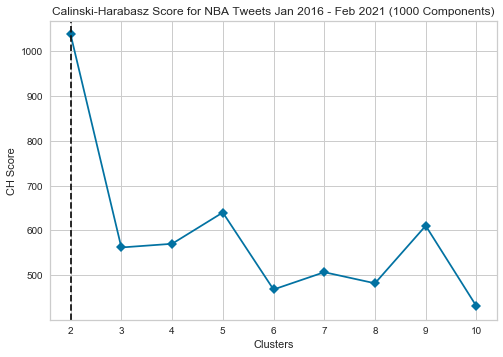

In [85]:
kmodel = KMeans()
tweet_viz = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz.fit(vec_matrix_pca_1000)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (1000 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_1000.png')

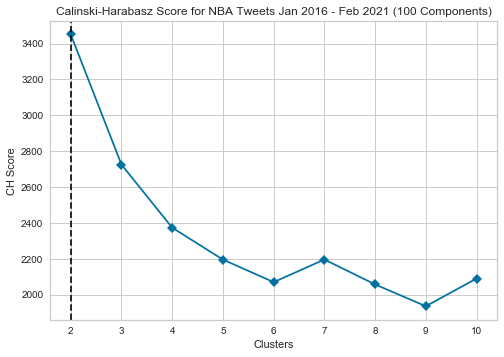

In [86]:
kmodel = KMeans()
tweet_viz_100 = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz_100.fit(vec_matrix_pca_100)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (100 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_100pca.png')

In [109]:
twitter_df.dropna(inplace=True)
twitter_df.drop_duplicates(subset=['date', 'tweet', 'source'],inplace=True)

## 2 Clusters

In [87]:
kmeans_two = KMeans(n_clusters=2, random_state=123)
kmeans_two.fit(vec_matrix_pca_100)
twitter_df['dual_labels'] = kmeans_two.labels_

In [89]:
twitter_df['dual_labels'].value_counts()

0    102685
1     25827
Name: dual_labels, dtype: int64

In [125]:
twitter_df.loc[twitter_df['dual_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
128357,2021-02-26,One number is unlike the other H/T @TheNBACentral,Basketball News,"[one, number, unlike, ht, thenbacentral, ]",0,2,3,3
51384,2021-02-26,"Bigger Than Basketball: The bond Marc Gasol shares with his other brother, Zach Randolph (by @Ro...",SI,"[bigger, basketball, bond, marc, gasol, share, brother, zach, randolph, rohannadkarni, ]",0,2,3,6
38019,2021-02-26,The most enjoyable phase of the Process,SI,"[enjoyable, phase, process, ]",0,2,3,6
81694,2021-02-26,All these games are blowouts. Good thing we have Warriors/Pelicans up next!,SB Nation,"[game, blowout, good, thing, warriorspelicans, next]",0,2,3,6
74292,2021-02-26,"In case you forgot, the Rockets and Trail Blazers have a beef to settle... tonight",SB Nation,"[case, forgot, rocket, trail, blazer, beef, settle, tonight, ]",0,2,3,6
59256,2021-02-26,LIVE: @BenGolliver is at Oracle Arena taking your Warriors-Cavs questions ahead of Game 5,SI,"[live, bengolliver, oracle, arena, taking, warriorscavs, question, ahead, game, 5, ]",0,2,3,6
61379,2021-02-26,Eight most interesting players in the #NBAPlayoffs. Whos on your list? (by @andrewsharp),SI,"[eight, interesting, player, nbaplayoffs, who, list, andrewsharp, ]",0,0,3,1
120383,2021-02-26,Russell Westbrook and Nick Collison now the only two players of the Thunder 2012 Finals team sti...,HoopsHype,"[russell, westbrook, nick, collison, two, player, thunder, 2012, final, team, still, contract, okc]",0,2,3,6
87387,2021-02-26,The LeBron of chess weighs in.,HoopsHype,"[lebron, chess, weighs]",0,2,3,0
52398,2021-02-26,"Watch: LeBron James, Kevin Durant among athletes starring in Nike 'Equality' campaign",SI,"[watch, lebron, james, kevin, durant, among, athlete, starring, nike, equality, campaign, ]",0,2,3,0


In [127]:
twitter_df.loc[twitter_df['dual_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
21379,2021-02-26,"NBA draft rumors: R.J. Barrett expected to fall to Knicks, Ja Morant likely to Grizzlies",SI,"[nba, draft, rumor, rj, barrett, expected, fall, knicks, ja, morant, likely, grizzly, ]",1,1,1,4
50686,2021-02-26,The Cavs posted the NBA's worst defense in Marchcan they flip the switch in April?,SI,"[cavs, posted, nbas, worst, defense, marchcan, flip, switch, april, ]",1,0,3,1
103817,2021-02-26,Amare Stoudemire considering NBA comeback.,HoopsHype,"[amare, stoudemire, considering, nba, comeback, ]",1,0,3,1
123456,2021-02-26,@dannyalextapia NBA is both the best and most entertaining in basketball. Premier League only th...,HoopsHype,"[dannyalextapia, nba, best, entertaining, basketball, premier, league, latter, perhaps, soccer]",1,0,3,1
104404,2021-02-26,"""Living arrangements vary from team to team, but players are put in a nice house or apartment. Y...",HoopsHype,"[living, arrangement, vary, team, team, player, put, nice, house, apartment, younger, player, of...",1,0,3,1
23989,2021-02-26,"It all sounds absurd to even think of right now, but Giannis has a big supermax decision to make...",SI,"[sound, absurd, even, think, right, giannis, big, supermax, decision, make, near, future, nba, w...",1,0,3,1
126257,2021-02-26,"The NBA is set to make Wilson the official game ball for the 2020-21 season, @ChrisHaynes report...",Slam,"[nba, set, make, wilson, official, game, ball, 202021, season, chrishaynes, report, league, spal...",1,0,2,1
71503,2021-02-26,More from our #NBA Trade Deadline focus series running all week at @TheAthletic. Our Salary Cap/...,The Athletic,"[nba, trade, deadline, focus, series, running, week, theathletic, salary, capcba, expert, dannyl...",1,0,3,1
39824,2021-02-26,How the NBA's new two-way contracts helped reshape the Clippers' vision (by @BenGolliver),SI,"[nbas, new, twoway, contract, helped, reshape, clipper, vision, bengolliver, ]",1,0,3,5
37173,2021-02-26,Villanova's Mikal Bridges has potential as a 3-and-D dynamo in the NBA,SI,"[villanovas, mikal, bridge, potential, 3andd, dynamo, nba, ]",1,0,3,1


## Three Clusters

In [88]:
kmeans_three = KMeans(n_clusters=3, random_state=123)
kmeans_three.fit(vec_matrix_pca_100)
twitter_df['trip_labels'] = kmeans_three.labels_

In [90]:
twitter_df['trip_labels'].value_counts()

2    101394
0     22760
1      4358
Name: trip_labels, dtype: int64

In [128]:
twitter_df.loc[twitter_df['trip_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
73187,2021-02-26,@JonCman1 looks like its NBA sunday to me.,SB Nation,"[joncman1, look, like, nba, sunday, ]",1,0,3,1
39382,2021-02-26,NBA trade deadline winners and losers: No one had a tougher day than Isaiah Thomas,SI,"[nba, trade, deadline, winner, loser, one, tougher, day, isaiah, thomas, ]",1,0,3,3
52725,2021-02-26,NBA Social Rankings: JaVale McGee made noise... while snoozing (by @KennyDucey),SI,"[nba, social, ranking, javale, mcgee, made, noise, snoozing, kennyducey, ]",1,0,3,1
14642,2021-02-26,The story behind the ring that is key to the NBA's restart,SI,"[story, behind, ring, key, nbas, restart, ]",1,0,3,1
22691,2021-02-26,NBA Power Rankings: Where does your team land in the final week of the regular season?,SI,"[nba, power, ranking, team, land, final, week, regular, season, ]",1,0,2,1
95424,2021-02-26,A reminder that Tony Parker is the top international scorer in NBA playoffs history.,HoopsHype,"[reminder, tony, parker, top, international, scorer, nba, playoff, history, ]",1,0,3,1
26028,2021-02-26,NBA Power Rankings: Stephen Curry and the Warriors are scorching hot,SI,"[nba, power, ranking, stephen, curry, warrior, scorching, hot, ]",1,0,3,1
93208,2021-02-26,New York City natives have made more money in the NBA than those of any other city in the last t...,HoopsHype,"[new, york, city, native, made, money, nba, city, last, three, decade, make, sense, considering,...",1,0,3,1
66472,2021-02-26,"Revealing the four greatest players in the NBA right now: LeBron, Giannis, Harden & Kawhi. Dive ...",The Athletic,"[revealing, four, greatest, player, nba, right, lebron, giannis, harden, kawhi, dive, sethpartno...",1,0,3,0
100162,2021-02-26,There's 42 countries with NBA players this season (outside of USA). Here they are:,HoopsHype,"[there, 42, country, nba, player, season, outside, usa, ]",1,0,2,1


In [129]:
twitter_df.loc[twitter_df['trip_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
33636,2021-02-26,Breakaway: @mikal_bridges joined @Robmahoney to talk about the NBA draft process,SI,"[breakaway, mikalbridges, joined, robmahoney, talk, nba, draft, process, ]",1,1,1,4
79380,2021-02-26,The annual tank-off to get better draft position is going to be especially weird this year.,SB Nation,"[annual, tankoff, get, better, draft, position, going, especially, weird, year, ]",0,1,1,4
33658,2021-02-26,What happens in between the final buzzer of a prospects last college game and the NBA draft? Mik...,SI,"[happens, final, buzzer, prospect, last, college, game, nba, draft, mikal, bridge, take, breakaw...",1,1,1,4
33757,2021-02-26,"Who is the best wing in the 2018 NBA draft? @JeremyWoo, @JakeLFischer and @bychrisjohnson weigh in",SI,"[best, wing, 2018, nba, draft, jeremywoo, jakelfischer, bychrisjohnson, weigh, ]",1,1,1,4
61833,2021-02-26,NBA draft Big Board 2.0: Guards shuffle in new rankings (by @Jeremy_Woo),SI,"[nba, draft, big, board, 20, guard, shuffle, new, ranking, jeremywoo, ]",1,1,1,4
32416,2021-02-26,Boogie is on the way,SI,"[boogie, way, ]",0,1,1,4
33851,2021-02-26,Mock Draft 9.0! @JeremyWoo projects all 60 picks as the trade chatter heats up:,SI,"[mock, draft, 90, jeremywoo, project, 60, pick, trade, chatter, heat, ]",1,1,1,4
58900,2021-02-26,PHOTOS: 2016 NBA mock draft,SI,"[photo, 2016, nba, mock, draft, ]",1,1,1,4
41128,2021-02-26,"2017 NBA Re-Draft: Where Jayson Tatum, Donovan Mitchell and Lonzo Ball would be picked now",SI,"[2017, nba, redraft, jayson, tatum, donovan, mitchell, lonzo, ball, would, picked, ]",1,1,1,4
35088,2021-02-26,Adam Silver is by far the Draft Lotterys biggest loser (by @BenGolliver),SI,"[adam, silver, far, draft, lottery, biggest, loser, bengolliver, ]",0,1,1,4


In [130]:
twitter_df.loc[twitter_df['trip_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
60489,2021-02-26,Dwyane Wades clutch performance helps Heat edge Raptors in Game 4 (by @DeAntae),SI,"[dwyane, wade, clutch, performance, help, heat, edge, raptor, game, 4, deantae, ]",0,2,3,6
31155,2021-02-26,Manu Ginobili was the greatest bench player ever (via @Fansided),SI,"[manu, ginobili, greatest, bench, player, ever, via, fansided, ]",0,2,0,6
43030,2021-02-26,But what happened after the pass?,SI,"[happened, pas, ]",0,2,3,6
7687,2021-02-26,"""Wait, it's not made of chocolate?""",Yahoo,"[wait, made, chocolate, ]",0,2,3,6
69121,2021-02-26,@talkhoops Love that for you,The Athletic,"[talkhoops, love]",0,2,3,6
84282,2021-02-26,No regular season hangover for the Warriors. Golden State blew out the Rockets in Game 1:,SB Nation,"[regular, season, hangover, warrior, golden, state, blew, rocket, game, 1, ]",0,2,2,6
108520,2021-02-26,(blank) is making me eat crow with his great play this season.,HoopsHype,"[blank, making, eat, crow, great, play, season]",0,2,2,6
72309,2021-02-26,,SB Nation,[],0,2,3,6
54214,2021-02-26,You can re-live Richard Jefferson yamming all over the Warriors right here:,SI,"[relive, richard, jefferson, yamming, warrior, right, ]",0,2,3,6
74239,2021-02-26,Cavs looking a little sloppy early,SB Nation,"[cavs, looking, little, sloppy, early, ]",0,2,3,6


## Six Categories - Samples

In [91]:
kmeans_six = KMeans(n_clusters=6, random_state=123)
kmeans_six.fit(vec_matrix_pca_100)
twitter_df['six_cat'] = kmeans_six.labels_

In [93]:
twitter_df['six_cat'].value_counts()

3    109781
2      5462
0      4990
1      4308
5      2797
4      1174
Name: six_cat, dtype: int64

In [110]:
twitter_df.loc[twitter_df['six_cat'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
7641,2021-02-26,Put that man on a POSTER (via @NBAonTNT) | #RipCity,Yahoo,"[put, man, poster, via, nbaontnt, ripcity, ]",0,2,0,6
14725,2021-02-26,Teamwork makes the dream work (via IG/6thsense.ball),SI,"[teamwork, make, dream, work, via, ig6thsenseball, ]",0,2,0,6
53826,2021-02-26,The Warriors are making Kevin Durant even more dominant in transition (via @The_Step_Back),SI,"[warrior, making, kevin, durant, even, dominant, transition, via, thestepback, ]",0,2,0,6
61112,2021-02-26,Coach LeBron (via @TheCauldron),SI,"[coach, lebron, via, thecauldron, ]",0,2,0,0
61403,2021-02-26,Amare turning back the clock (via @NBAonTNT) #NBAPlayoffs,SI,"[amare, turning, back, clock, via, nbaontnt, nbaplayoffs, ]",0,2,0,6
3089,2021-02-26,We gather here today... Derrick Jones Jr. just CLAIMED A SOUL (via @TrashTalk_fr),Yahoo,"[gather, today, derrick, jones, jr, claimed, soul, via, trashtalkfr, ]",0,2,0,6
59716,2021-02-26,This is a double foul? (via @TheCauldron),SI,"[double, foul, via, thecauldron, ]",0,2,0,6
22121,2021-02-26,Jazz-Rockets Game 5 is getting tight late (via @HoustonRockets),SI,"[jazzrockets, game, 5, getting, tight, late, via, houstonrockets, ]",0,2,0,6
63095,2021-02-26,Joe Johnson hit his first shot attempt with the Heat. He started against the Knicks at MSG (via ...,SI,"[joe, johnson, hit, first, shot, attempt, heat, started, knicks, msg, via, miamiheat, ]",0,2,0,6
6742,2021-02-26,Nice touch pass from Zo to JaVale for the HAMMER! (Via @Lakers),Yahoo,"[nice, touch, pas, zo, javale, hammer, via, lakers, ]",0,2,0,5


In [112]:
twitter_df.loc[twitter_df['six_cat'] == 1].sample(n=100)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
127787,2021-02-26,"With the 1st pick in the 2019 NBA Draft, the Pelicans have selected Zion Williamson.",Slam,"[1st, pick, 2019, nba, draft, pelican, selected, zion, williamson, ]",1,1,1,4
41553,2021-02-26,The Front Offices inaugural draft mailbag covers all your burning questions,SI,"[front, office, inaugural, draft, mailbag, cover, burning, question, ]",0,1,1,4
120784,2021-02-26,Pre-draft interview: Ben Simmons on the Sixers.,HoopsHype,"[predraft, interview, ben, simmons, sixer, ]",0,1,1,4
26869,2021-02-26,2019 NBA Mock Draft 2.0: Zion Williamson to the Hawks at No. 1,SI,"[2019, nba, mock, draft, 20, zion, williamson, hawk, 1, ]",1,1,1,4
20275,2021-02-26,NBA draft mailbag: @JeremyWoo answers all of your burning questions,SI,"[nba, draft, mailbag, jeremywoo, answer, burning, question, ]",1,1,1,4
93417,2021-02-26,Top 5 players of the 2000 draft class: 1. No. 8 pick 2. No. 1 pick 3. No. 43 pick 4. No. 5 pick ...,HoopsHype,"[top, 5, player, 2000, draft, class, 1, 8, pick, 2, 1, pick, 3, 43, pick, 4, 5, pick, 5, 16, pic...",1,1,1,4
28512,2021-02-26,"You already know about Zion, but which other draft prospects helped their stock the most at the ...",SI,"[already, know, zion, draft, prospect, helped, stock, champion, classic, ]",0,1,1,4
47608,2021-02-26,The NBA draft has seen LaVar Ball's act before. Former Wolves GM David Kahn reveals his story fr...,SI,"[nba, draft, seen, lavar, ball, act, former, wolf, gm, david, kahn, reveals, story, 2009, ]",1,1,1,4
127780,2021-02-26,"With the 8th pick in the 2019 NBA Draft, the Pelicans (by way of the Hawks) are drafting Jaxson ...",Slam,"[8th, pick, 2019, nba, draft, pelican, way, hawk, drafting, jaxson, hayes, everything, need, kno...",1,1,1,4
127777,2021-02-26,"With the 11th pick in the 2019 NBA Draft, the Suns will take Cam Johnson The full 2019 NBA Draft...",Slam,"[11th, pick, 2019, nba, draft, sun, take, cam, johnson, full, 2019, nba, draft, result, list, ]",1,1,1,4


In [113]:
twitter_df.loc[twitter_df['six_cat'] == 2].sample(n=100)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
59419,2021-02-26,Richard Jefferson hot early starting for Love. He spoke to SI earlier this season #NBAFinals,SI,"[richard, jefferson, hot, early, starting, love, spoke, si, earlier, season, nbafinals, ]",0,2,2,6
78922,2021-02-26,This is Joakim Noah's second surgery this season:,SB Nation,"[joakim, noah, second, surgery, season, ]",0,2,2,6
74248,2021-02-26,"This season has been Carmelo Anthonys worst of his career, and there are still no signs of turni...",SB Nation,"[season, carmelo, anthony, worst, career, still, sign, turning, around, ]",0,2,2,6
93142,2021-02-26,Season preview: New York Knicks,HoopsHype,"[season, preview, new, york, knicks, ]",0,2,2,5
26371,2021-02-26,This season's Warriors seem to have more problems than years past and fewer easy answers (by @An...,SI,"[season, warrior, seem, problem, year, past, fewer, easy, answer, andrewsharp, ]",0,2,2,6
107401,2021-02-26,"Enes Kanter is enjoying the best season of his career, and other players have taken notice.",HoopsHype,"[ene, kanter, enjoying, best, season, career, player, taken, notice, ]",0,0,2,1
5893,2021-02-26,"Another Laker is out. Lonzo Ball has been shut down for rest of season with left ankle issue, pe...",Yahoo,"[another, laker, lonzo, ball, shut, rest, season, left, ankle, issue, per, shamscharania, ]",0,2,2,6
89824,2021-02-26,"Contrary to speculation, John Wall says he won't return this season",HoopsHype,"[contrary, speculation, john, wall, say, wont, return, season, ]",0,2,2,6
78121,2021-02-26,it's petty season,SB Nation,"[petty, season, ]",0,2,2,6
48813,2021-02-26,"It looks more inevitable than ever, but Warriors-Cavs III hasnt cheapened the NBA season (by @Ro...",SI,"[look, inevitable, ever, warriorscavs, iii, hasnt, cheapened, nba, season, robmahoney, ]",1,0,2,1


In [114]:
twitter_df.loc[twitter_df['six_cat'] == 3].sample(n=100)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
27238,2021-02-26,All love for D-Wade,SI,"[love, dwade, ]",0,2,3,6
91119,2021-02-26,"NBA contracts key dates: Deadlines, options, trade eligibility...",HoopsHype,"[nba, contract, key, date, deadline, option, trade, eligibility, ]",1,0,3,1
45778,2021-02-26,What should the Knicks do next? @TheCrossover debates,SI,"[knicks, next, thecrossover, debate, ]",0,2,3,6
49376,2021-02-26,Washington's Kelly Oubre suspended for Game 4 vs. Boston after charging at Kelly Olynyk,SI,"[washington, kelly, oubre, suspended, game, 4, v, boston, charging, kelly, olynyk, ]",0,2,3,6
61153,2021-02-26,"Thunder-Mavericks Game 4 is underway, with OKC attempting to take a 3-1 series lead. Follow alon...",SI,"[thundermavericks, game, 4, underway, okc, attempting, take, 31, series, lead, follow, along, ]",0,2,3,6
50648,2021-02-26,Thumb injury set to end Tristan Thompsons league-leading games played streak,SI,"[thumb, injury, set, end, tristan, thompson, leagueleading, game, played, streak, ]",0,2,3,6
73693,2021-02-26,"Lakers fans, wya?",SB Nation,"[lakers, fan, wya]",0,2,3,5
30086,2021-02-26,Can we get a birthday track from KD?,SI,"[get, birthday, track, kd, ]",0,2,3,6
4350,2021-02-26,Klay's jumper looks VERY healthy,Yahoo,"[klays, jumper, look, healthy, ]",0,2,3,6
1413,2021-02-26,Just give B.I. the most improved award already,Yahoo,"[give, bi, improved, award, already, ]",0,2,3,6


In [115]:
twitter_df.loc[twitter_df['six_cat'] == 4].sample(n=100)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
111276,2021-02-26,11 things you may not know about the late Drazen Petrovic.,HoopsHype,"[11, thing, may, know, late, drazen, petrovic, ]",0,2,4,2
96560,2021-02-26,10 things you may not know about Kemba Walker.,HoopsHype,"[10, thing, may, know, kemba, walker, ]",0,2,4,2
97978,2021-02-26,Kristaps Porzingis once said the Knicks were the best organization in the NBA. That was many moo...,HoopsHype,"[kristaps, porzingis, said, knicks, best, organization, nba, many, moon, ago, course, thing, may...",1,0,4,2
108945,2021-02-26,11 things you may not know about Karl Malone.,HoopsHype,"[11, thing, may, know, karl, malone, ]",0,2,4,2
115757,2021-02-26,10 things you may not know about Russell Westbrook.,HoopsHype,"[10, thing, may, know, russell, westbrook, ]",0,2,4,2
89673,2021-02-26,28 things you may not remember about Cavs-Warriors Game 7,HoopsHype,"[28, thing, may, remember, cavswarriors, game, 7, ]",0,2,4,2
116132,2021-02-26,10 things you may not know about John Wall.,HoopsHype,"[10, thing, may, know, john, wall, ]",0,2,4,2
98416,2021-02-26,10 things you may not know about Mike Conley.,HoopsHype,"[10, thing, may, know, mike, conley, ]",0,2,4,2
113331,2021-02-26,11 things you may not know about Jimmy Butler.,HoopsHype,"[11, thing, may, know, jimmy, butler, ]",0,2,4,2
104782,2021-02-26,"@GalacticPerson It's ""things you may not know"" and I think people know about that.",HoopsHype,"[galacticperson, thing, may, know, think, people, know]",0,2,4,2


In [116]:
twitter_df.loc[twitter_df['six_cat'] == 5].sample(n=100)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
121461,2021-02-26,The top free agent signings in Raptors history. It's not an impressive list.,HoopsHype,"[top, free, agent, signing, raptor, history, impressive, list, ]",0,2,5,6
47760,2021-02-26,Who are the Warriors' upcoming free agents?,SI,"[warrior, upcoming, free, agent, ]",0,2,5,6
112211,2021-02-26,Free Agency 2017: The best small forwards available.,HoopsHype,"[free, agency, 2017, best, small, forward, available, ]",0,2,5,6
66506,2021-02-26,"""The NBA has been the most progressive league, done the most, but they need to do more."" Anonymo...",The Athletic,"[nba, progressive, league, done, need, anonymous, nba, agent, spoke, openly, bubble, free, agenc...",1,0,5,1
113153,2021-02-26,Free agent look: Andre Roberson.,HoopsHype,"[free, agent, look, andre, roberson, ]",0,2,5,6
119706,2021-02-26,Russell Westbrook was No. 3 in our 2017 free agent rankings.,HoopsHype,"[russell, westbrook, 3, 2017, free, agent, ranking, ]",0,2,5,6
87571,2021-02-26,All the free agent signings in one place.,HoopsHype,"[free, agent, signing, one, place, ]",0,2,5,3
19527,2021-02-26,"With so many deals already done, where will JaMychal Green and Jabari Parker land in free agency?",SI,"[many, deal, already, done, jamychal, green, jabari, parker, land, free, agency, ]",0,2,5,6
127630,2021-02-26,"Khris Middleton is expected to sign a five-year, $178 million deal with the Milwaukee Bucks when...",Slam,"[khris, middleton, expected, sign, fiveyear, 178, million, deal, milwaukee, buck, free, agency, ...",0,2,5,6
94654,2021-02-26,BAR RACE ALERT We have ranked the top NBA agencies in terms of client wages through the years. (...,HoopsHype,"[bar, race, alert, ranked, top, nba, agency, term, client, wage, year, crazy, 2019, free, agent,...",1,0,5,1


## Seven Categories - Samples

In [92]:
kmeans_seven = KMeans(n_clusters=7, random_state=123)
kmeans_seven.fit(vec_matrix_pca_100)
twitter_df['sev_cat'] = kmeans_seven.labels_

In [94]:
twitter_df['sev_cat'].value_counts()

6    85789
1    19775
5     7115
0     6905
4     4228
3     3531
2     1169
Name: sev_cat, dtype: int64

In [117]:
twitter_df.loc[twitter_df['sev_cat'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
109269,2021-02-26,LeBron game-time decision for season opener.,HoopsHype,"[lebron, gametime, decision, season, opener, ]",0,2,2,0
80854,2021-02-26,"LeBron played 43 minutes last night. Kyrie played 41. The Cavs held on, but their bench needs to...",SB Nation,"[lebron, played, 43, minute, last, night, kyrie, played, 41, cavs, held, bench, need, pull, weig...",0,2,3,0
54039,2021-02-26,Happy 32nd Birthday @KingJames! What's your favorite LeBron SI cover?,SI,"[happy, 32nd, birthday, kingjames, whats, favorite, lebron, si, cover, ]",0,2,3,0
35320,2021-02-26,Chris Paul and James Harden have reached the Warriors. Will their tag-team plan work?,SI,"[chris, paul, james, harden, reached, warrior, tagteam, plan, work, ]",0,2,3,0
51683,2021-02-26,LEBRON JAMES IS UNCONSCIOUS,SI,"[lebron, james, unconscious, ]",0,2,3,0
42275,2021-02-26,Enes Kanter really enjoys talking trash to LeBron James,SI,"[ene, kanter, really, enjoys, talking, trash, lebron, james, ]",0,2,3,0
73575,2021-02-26,"LeBron rules basketball, but thats only part of his story.",SB Nation,"[lebron, rule, basketball, thats, part, story, ]",0,2,3,0
64120,2021-02-26,Gallery: Will LeBron become the @NBA's all-time leading scorer?,SI,"[gallery, lebron, become, nbas, alltime, leading, scorer, ]",1,0,3,0
26177,2021-02-26,How far can James Harden carry the Houston Rockets? (via @Fansided),SI,"[far, james, harden, carry, houston, rocket, via, fansided, ]",0,2,0,0
73879,2021-02-26,JAMES HARDEN HIT A THREE POINTER!,SB Nation,"[james, harden, hit, three, pointer]",0,2,3,0


In [118]:
twitter_df.loc[twitter_df['sev_cat'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
88648,2021-02-26,Should the 76ers trade Joel Embiid or Ben Simmons? NBA executives and coaches weigh in,HoopsHype,"[76ers, trade, joel, embiid, ben, simmons, nba, executive, coach, weigh, ]",1,0,3,1
46857,2021-02-26,NBA off-season report card: @andrewsharp grades the best and worst teams,SI,"[nba, offseason, report, card, andrewsharp, grade, best, worst, team, ]",1,0,2,1
96531,2021-02-26,BAR RACE ALERT Take a look at the NBA teams with the worst winning percentages this century. Sto...,HoopsHype,"[bar, race, alert, take, look, nba, team, worst, winning, percentage, century, storied, franchis...",1,0,3,1
16417,2021-02-26,Bold predictions: The NBA will expand by adding franchises in Seattle and Louisville,SI,"[bold, prediction, nba, expand, adding, franchise, seattle, louisville, ]",1,0,3,1
19309,2021-02-26,NBA Summer League: The leading story from Vegas is the rookies who didn't play,SI,"[nba, summer, league, leading, story, vega, rookie, didnt, play, ]",1,0,3,1
17230,2021-02-26,NBA power rankings: The Kyrie Irving show is thus far more of a jovial affair than last years do...,SI,"[nba, power, ranking, kyrie, irving, show, thus, far, jovial, affair, last, year, dour, season, ...",1,0,2,1
114962,2021-02-26,Ranking: The Top 25 NBA players under 25.,HoopsHype,"[ranking, top, 25, nba, player, 25, ]",1,0,3,1
39798,2021-02-26,"LeBron said teams get a pass for trading players, whereas players are roasted if they leave a te...",SI,"[lebron, said, team, get, pas, trading, player, whereas, player, roasted, leave, team, free, age...",1,0,5,1
63654,2021-02-26,"SIs NBA team gave predictions for #NBAAllStarTO, including who will win off-the-court MVP",SI,"[si, nba, team, gave, prediction, nbaallstarto, including, win, offthecourt, mvp, ]",1,0,3,1
122531,2021-02-26,NBA players largely ignoring the Warriors' record on Twitter. It's all about Kobe Bean Bryant.,HoopsHype,"[nba, player, largely, ignoring, warrior, record, twitter, kobe, bean, bryant, ]",1,0,3,1


In [119]:
twitter_df.loc[twitter_df['sev_cat'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
94559,2021-02-26,11 things you may not know about Bill Walton.,HoopsHype,"[11, thing, may, know, bill, walton, ]",0,2,4,2
100127,2021-02-26,10 things you may not know about Jason Terry. Free agent!,HoopsHype,"[10, thing, may, know, jason, terry, free, agent, ]",0,2,4,2
98678,2021-02-26,Your favorite NBA head coach (or not) Steve Kerr won a World Championship with Team USA way back...,HoopsHype,"[favorite, nba, head, coach, steve, kerr, world, championship, team, usa, way, back, day, thing,...",1,0,4,2
101253,2021-02-26,"Only two players have won the Euroleague, NBA and Olympic titles. Manu Ginobili was one of them....",HoopsHype,"[two, player, euroleague, nba, olympic, title, manu, ginobili, one, thing, may, know, ]",1,0,4,2
109850,2021-02-26,10 things you may not know about Clyde Drexler.,HoopsHype,"[10, thing, may, know, clyde, drexler, ]",0,2,4,2
101990,2021-02-26,11 things you may not know about fascinating new Laker Michael Beasley.,HoopsHype,"[11, thing, may, know, fascinating, new, laker, michael, beasley, ]",0,2,4,2
110410,2021-02-26,11 things you may not know about Hassan Whiteside.,HoopsHype,"[11, thing, may, know, hassan, whiteside, ]",0,2,4,2
96560,2021-02-26,10 things you may not know about Kemba Walker.,HoopsHype,"[10, thing, may, know, kemba, walker, ]",0,2,4,2
105806,2021-02-26,14 things you may not know about Kevin Garnett,HoopsHype,"[14, thing, may, know, kevin, garnett, ]",0,2,4,2
114485,2021-02-26,11 things you may not know about Jeremy Lin.,HoopsHype,"[11, thing, may, know, jeremy, lin, ]",0,2,4,2


In [120]:
twitter_df.loc[twitter_df['sev_cat'] == 3].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
21981,2021-02-26,All James Harden wants is a fair chance. Is he getting one?,SI,"[james, harden, want, fair, chance, getting, one, ]",0,2,3,3
55124,2021-02-26,What makes @CJMcCollum one of the NBA's shooting stars? @RobMahoney explains,SI,"[make, cjmccollum, one, nbas, shooting, star, robmahoney, explains, ]",1,0,3,3
18512,2021-02-26,Kawhi Leonard gives away one million backpacks to Southern California students,SI,"[kawhi, leonard, give, away, one, million, backpack, southern, california, student, ]",0,2,3,3
25786,2021-02-26,Kyrie Irving received countless lessons from LeBron in Cleveland. It turns out he needed one more,SI,"[kyrie, irving, received, countless, lesson, lebron, cleveland, turn, needed, one, ]",0,2,3,3
29960,2021-02-26,One Vancouver Grizzlies superfan set off on a quest to find Bryant 'Big Country' Reeves and came...,SI,"[one, vancouver, grizzly, superfan, set, quest, find, bryant, big, country, reef, came, away, ex...",0,2,3,3
125811,2021-02-26,Among the hurdles for a 2020-21 campaign is what to do about the Toronto Raptors if access to th...,Slam,"[among, hurdle, 202021, campaign, toronto, raptor, access, canadaus, border, limited, one, poten...",0,2,3,3
24570,2021-02-26,How Kyle O'Quinn went from having one scholarship offer to living out his NBA dreams,SI,"[kyle, oquinn, went, one, scholarship, offer, living, nba, dream, ]",1,0,3,3
84958,2021-02-26,"The Pistons are on pace to score 60 points in the first haerr, game. Pistons are on pace to scor...",SB Nation,"[piston, pace, score, 60, point, first, haerr, game, piston, pace, score, 60, trail, wizard, 341...",0,2,3,3
18503,2021-02-26,Fun guy Kawhi Leonard gave away one million backpacks to Southern California students,SI,"[fun, guy, kawhi, leonard, gave, away, one, million, backpack, southern, california, student, ]",0,2,3,3
65588,2021-02-26,"Last year, CAAs @EvanDaniels left 247Sports to become a sports agent. Hes far from a one-off. In...",The Athletic,"[last, year, caas, evandaniels, left, 247sports, become, sport, agent, he, far, oneoff, inside, ...",0,2,3,3


In [121]:
twitter_df.loc[twitter_df['sev_cat'] == 4].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
95727,2021-02-26,These NBA draft photos from over the years are both awkward and awesome.,HoopsHype,"[nba, draft, photo, year, awkward, awesome, ]",1,1,1,4
45767,2021-02-26,A Slovenian star and could be the No. 1 pick in the 2018 NBA draft,SI,"[slovenian, star, could, 1, pick, 2018, nba, draft, ]",1,1,1,4
58939,2021-02-26,"NBA draft position rankings: Top guards, wings and big men (by @JeremyWoo)",SI,"[nba, draft, position, ranking, top, guard, wing, big, men, jeremywoo, ]",1,1,1,4
60208,2021-02-26,NBA draft lottery preview: Five things to watch (by @JeremyWoo),SI,"[nba, draft, lottery, preview, five, thing, watch, jeremywoo, ]",1,1,1,4
47431,2021-02-26,2017 NBA Draft Grades: Best and worst picks (by @andrewsharp),SI,"[2017, nba, draft, grade, best, worst, pick, andrewsharp, ]",1,1,1,4
126310,2021-02-26,"""It would take something really bad for us to maybe not draft him,"" Riley said.",Slam,"[would, take, something, really, bad, u, maybe, draft, riley, said, ]",0,1,1,4
45739,2021-02-26,Why @jeremywoo thinks Marvin Bagley III could be the 2018 NBA draft's prized jewel,SI,"[jeremywoo, think, marvin, bagley, iii, could, 2018, nba, draft, prized, jewel, ]",1,1,1,4
14015,2021-02-26,Subscribe now to receive exclusive content and intel ahead of the 2020 NBA draft,SI,"[subscribe, receive, exclusive, content, intel, ahead, 2020, nba, draft, ]",1,1,1,4
94586,2021-02-26,2002 NBA re-draft: The way it should have been.,HoopsHype,"[2002, nba, redraft, way, ]",1,1,1,4
102958,2021-02-26,Who should be the No. 10 pick of the draft? #HoopsHypeDraft,HoopsHype,"[10, pick, draft, hoopshypedraft]",1,1,1,4


In [122]:
twitter_df.loc[twitter_df['sev_cat'] == 5].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
74048,2021-02-26,New head coach Dawn Staley and Team USA dominated in their exhibition debut. MVP Sylvia Fowles l...,SB Nation,"[new, head, coach, dawn, staley, team, usa, dominated, exhibition, debut, mvp, sylvia, fowles, l...",0,2,3,5
26618,2021-02-26,How the Lakers stifled the Warriors' offense (by @RobMahoney),SI,"[lakers, stifled, warrior, offense, robmahoney, ]",0,2,3,5
79342,2021-02-26,Never trust a mascot from New Orleans:,SB Nation,"[never, trust, mascot, new, orleans, ]",0,2,3,5
71138,2021-02-26,NEW #NBAPlayoffs Daily Ding @talkhoops and @BigWos recap a wild weekend and talk to @billoram ab...,The Athletic,"[new, nbaplayoffs, daily, ding, talkhoops, bigwos, recap, wild, weekend, talk, billoram, lakers,...",0,2,3,5
71160,2021-02-26,NEW #NBAPlayoffs Daily Ding @talkhoops and @Travonne recap Monday night and theyre joined by @jw...,The Athletic,"[new, nbaplayoffs, daily, ding, talkhoops, travonne, recap, monday, night, theyre, joined, jwqui...",0,2,3,5
22781,2021-02-26,"New Open floor podcast: History's least enjoyable all-time greats, robot referees, the state of ...",SI,"[new, open, floor, podcast, history, least, enjoyable, alltime, great, robot, referee, state, ja...",0,2,3,5
21286,2021-02-26,Giannis Antetokounmpo and brother Kostas star in touching new commercial,SI,"[giannis, antetokounmpo, brother, kostas, star, touching, new, commercial, ]",0,2,3,5
77467,2021-02-26,The Lakers and Pacers have started to discuss a Paul George trade.,SB Nation,"[lakers, pacer, started, discus, paul, george, trade, ]",0,2,3,5
3914,2021-02-26,"Boogie wants to restore the feeling. DeMarcus Cousins will wear No. 15, his old Kings number, wi...",Yahoo,"[boogie, want, restore, feeling, demarcus, cousin, wear, 15, old, king, number, lakers, season, ]",0,2,2,5
7894,2021-02-26,"Magic Johnson thinks Lonzo Ball's ""beautiful"" new jumper will lead to a ""breakout season"" (via @...",Yahoo,"[magic, johnson, think, lonzo, ball, beautiful, new, jumper, lead, breakout, season, via, lakers, ]",0,2,2,5


In [123]:
twitter_df.loc[twitter_df['sev_cat'] == 6].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,trip_labels,six_cat,sev_cat
96315,2021-02-26,"""We have to deal with uncomfortable situations. Ive heard about a player hooking up with another...",HoopsHype,"[deal, uncomfortable, situation, ive, heard, player, hooking, another, player, girlfriend, start...",0,2,3,6
36366,2021-02-26,Kawhi Leonard injury timeline: How did the Spurs get to this point?,SI,"[kawhi, leonard, injury, timeline, spur, get, point, ]",0,2,3,6
123078,2021-02-26,Darko Milicic is a farmer now. That's all I understand.,HoopsHype,"[darko, milicic, farmer, thats, understand, ]",0,2,3,6
124377,2021-02-26,Kristaps Porzingis and Karl-Anthony Towns are Rookies of the Month again. Who will win Rookie of...,HoopsHype,"[kristaps, porzingis, karlanthony, town, rookie, month, win, rookie, year]",0,2,3,6
78585,2021-02-26,This shouldn't be legal,SB Nation,"[shouldnt, legal, ]",0,2,3,6
85033,2021-02-26,Lets not take for granted how Justise Winslow has fit in on a veteran Heat team.,SB Nation,"[let, take, granted, justise, winslow, fit, veteran, heat, team, ]",0,2,3,6
33454,2021-02-26,The Michael Jordan of Delaware is headed to Milwakuee,SI,"[michael, jordan, delaware, headed, milwakuee, ]",0,2,3,6
12556,2021-02-26,Waiting for an opponent in the parking lot. Lifting a writer into the air. Shaq is a true 1 of 1...,Yahoo,"[waiting, opponent, parking, lot, lifting, writer, air, shaq, true, 1, 1, tbrownyahoo, ]",0,2,3,6
34949,2021-02-26,Brad Stevens was asked if he's coaching for his job during a conference call,SI,"[brad, stevens, asked, he, coaching, job, conference, call, ]",0,2,3,6
76187,2021-02-26,BREAKING from Joel Embiid:,SB Nation,"[breaking, joel, embiid, ]",0,2,3,6


In [24]:
twitter_df.to_csv('nba_twitter.csv', index=False)